In [5]:
import scipy
import scipy.integrate as integrate
from scipy.interpolate import interp1d
#from scipy import interpolate
import matplotlib.pyplot as plt
import numpy as np
import sys
from sympy import *
sys.path.append("../")
from pyACC.calculus import *
from pyACC.cosmology import *

For a fixed cosmological model create a linear interpolator

In [6]:
z_f = 1
redshift = np.linspace(0,z_f,100)
Dc_t = [Dc(z) for z in redshift]

In [7]:
#10 is the number of bins. In the future is better to increase it
x = np.linspace(0,z_f,10)
y = [Dc(z) for z in x]
temp = lambda z : Dc(z)
Dc_i = interp1d(x,y)

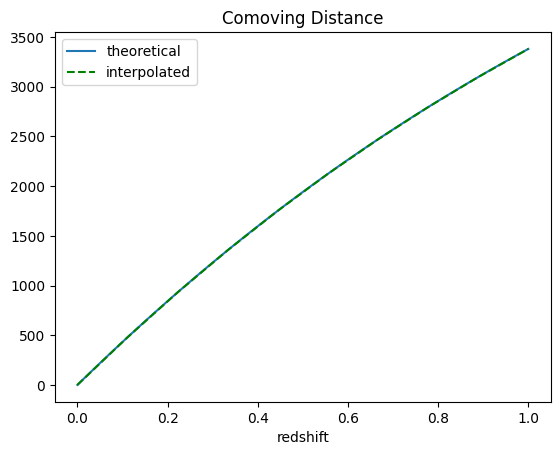

In [8]:
plt.plot(redshift,Dc_t)
plt.plot(x,Dc_i(x),'--g')
plt.xlabel('redshift')
plt.title('Comoving Distance')
plt.legend(['theoretical', 'interpolated'])

Compute residuals and compare with the theoretical error

In [ ]:
x_err = np.linspace(0,1,100)
temp_t = [Dc(z) for z in x_err]
deltad = np.abs(Dc_i(x_err) - temp_t)
plt.plot(x_err,deltad)
plt.xlabel('redshift')
plt.title('Residuals')

In [ ]:
err_t = []
for i in range (0,100):
    temp = lambda z : Dc(z)
    temp1 = lambda z : np.abs(diff(temp,z,2)) #absolute value of the second derivative of Dc
    x_temp = np.arange(x_err[i],x_err[i+1],0.001)
    temp2 = [temp1(z) for z in x_temp]
    max = np.max(temp2)
    err_t = np.append(err_t, max*(x_err[i+1]-x_err[i])**2/8)

plt.plot(x_err,err_t)

In [ ]:
temp = lambda z : Dc(z)
temp1 = lambda z : np.abs(diff(temp,z,2)) #absolute value of the second derivative of Dc